<a href="https://colab.research.google.com/github/Ayanlola2002/korlokote_project/blob/main/SalesData_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:

train=pd.read_csv('/content/salesData.csv',dtype={'Thickness':str,'ItemCost':str,'Sales Price':str,'Batch Quantity':str,'Vat Value':str,'Sales Amount':str})

In [ ]:
train.loc[[6964,6965,6966]]

,#,Coil Pattern,Group Name1,Product,Document Number,Doc. Date,Week,Month,Group Name2,Customer Code,Customer Name,Item Code,Item Description,Thickness,Width,Colour,Batch Number,ItemCost,Sales Price,Batch Quantity,Vat Value,Sales Amount
6964,6965,Embossed,FG ALUMINIUM,FGALUM,1111,28-04-2011,Week 4,4,Other Local Group,CIQ0001,Queensway Aluminium Co.Ltd,FGAEC05506DIVY120000,FG 0.55 x 1200 ALUM Ivory Dimond,0.55,1200,Ivory,KKTA1100009949,555.8536,655,"1,620.00","53,055.00","1,061,100.00"
6965,6966,Embossed,FG ALUMINIUM,FGALUM,1112,28-04-2011,Week 4,4,Other Local Group,CIQ0001,Queensway Aluminium Co.Ltd,FGAEC04506DDBN120000,FG 0.45 x 1200 ALUM Dark Brown Dimond,0.45,1200,Dark Brown,KKTA1100010396,553.5076,655,"2,065.00","67,628.75","1,352,575.00"
6966,6967,Embossed,FG ALUMINIUM,FGALUM,1112,28-04-2011,Week 4,4,Other Local Group,CIQ0001,Queensway Aluminium Co.Ltd,FGAEC04506DDBN120000,FG 0.45 x 1200 ALUM Dark Brown Dimond,0.45,1200,Dark Brown,KKTA1100010307,553.5076,655,"1,950.00","63,862.50","1,277,250.00"


In [ ]:
train['Doc. Date']=pd.to_datetime(train['Doc. Date'],dayfirst=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77895 entries, 0 to 77894
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   #                 77895 non-null  int64         
 1   Coil Pattern      77895 non-null  object        
 2   Group Name1       77895 non-null  object        
 3   Product           77895 non-null  object        
 4   Document Number   77895 non-null  int64         
 5   Doc. Date         77895 non-null  datetime64[ns]
 6   Week              77895 non-null  object        
 7   Month             77895 non-null  int64         
 8   Group Name2       77895 non-null  object        
 9   Customer Code     77895 non-null  object        
 10  Customer Name     77895 non-null  object        
 11  Item Code         77895 non-null  object        
 12  Item Description  77895 non-null  object        
 13  Thickness         77895 non-null  object        
 14  Width             7789

In [ ]:
#check for null values
train.isnull().sum()

#                   0
Coil Pattern        0
Group Name1         0
Product             0
Document Number     0
Doc. Date           0
Week                0
Month               0
Group Name2         0
Customer Code       0
Customer Name       0
Item Code           0
Item Description    0
Thickness           0
Width               0
Colour              0
Batch Number        0
ItemCost            0
Sales Price         0
Batch Quantity      0
Vat Value           0
Sales Amount        0
dtype: int64

In [ ]:
train.tail()

,#,Coil Pattern,Group Name1,Product,Document Number,Doc. Date,Week,Month,Group Name2,Customer Code,Customer Name,Item Code,Item Description,Thickness,Width,Colour,Batch Number,ItemCost,Sales Price,Batch Quantity,Vat Value,Sales Amount
77890,77891,Embossed,FG ALUMINIUM,FGALUM,2013101015,2013-07-05,Week 1,7,Local Group Tower Al,CIA0009,Aluminium Rolling Mills,FGAEC05506DPOR030000,FG 0.55 x 0300 ALUM P.O.Red Dimond,0.55,300,P.O Red,KKTBKM5286/09,580,228.58,46,525.73,"10,514.68"
77891,77892,Embossed,FG ALUMINIUM,FGALUM,2013101015,2013-07-05,Week 1,7,Local Group Tower Al,CIA0009,Aluminium Rolling Mills,FGAEC05506DPOR040000,FG 0.55 x 0400 ALUM P.O.Red Dimond,0.55,400,P.O Red,KKTAT0085,580,228.58,48,548.59,"10,971.84"
77892,77893,Embossed,FG ALUMINIUM,FGALUM,2013101015,2013-07-05,Week 1,7,Local Group Tower Al,CIA0009,Aluminium Rolling Mills,FGAEC05506DTCR045000,FG 0.55 x 0450 ALUM T.C Red Dimond,0.55,450,T.C Red,KKTA0210A0412AI,580,228.58,60,685.74,"13,714.80"
77893,77894,Embossed,FG ALUMINIUM,FGALUM,2013101015,2013-07-05,Week 1,7,Local Group Tower Al,CIA0009,Aluminium Rolling Mills,FGAEC07006DDBN040000,FG 0.70 x 0400 ALUM Dark Brown Dimond,0.7,400,Dark Brown,KKTM0910A0245,504.1657,228.58,160,"1,828.64","36,572.80"
77894,77895,Embossed,FG ALUMINIUM,FGALUM,2013101015,2013-07-05,Week 1,7,Local Group Tower Al,CIA0009,Aluminium Rolling Mills,FGAEC07006DDBN040000,FG 0.70 x 0400 ALUM Dark Brown Dimond,0.7,400,Dark Brown,KKTQ0910A0236,504.1657,228.58,160,"1,828.64","36,572.80"


In [ ]:
#some values has string needs to be removed
train['Thickness'].unique()

array(['0.7', '0.55', '0.45', '0.6', '0.4', '0.5', '0.8', '0.35', '0.3',
       '1', '0.65', '1.2', '0.25', '0.9', '0.72', '0.26', '0.53', '0.42',
       '0.52', '0.75', '0.57', '0.43', '0.63', '0.67', '0.62', '0.40B',
       '0.40C', '0.2', '0.28', '0.37', '0.23', '0.32', '0.38', '0.27',
       '0.31', '0.15', '0.18', '0.33', '0.47'], dtype=object)

In [ ]:
#checking datatypes of columns for object datatype
train['Thickness'].apply(type).value_counts()

<class 'str'>    77895
Name: Thickness, dtype: int64

In [ ]:
#can be converted directly by astype
train['ItemCost'].unique()

array(['508.8909', '517.5291', '526.0892', ..., '16.3102', '504.1657',
       '513.7143'], dtype=object)

In [ ]:
#checking datatypes of columns for object datatype
train['ItemCost'].apply(type).value_counts()

<class 'str'>    77895
Name: ItemCost, dtype: int64

In [ ]:
#can be converted directly by astype
train['Sales Price'].unique()

array(['649', '639', '654', '647', '664', '659', '660.52', '454.22',
       '621', '645.82', '631', '694', '653.66', '504', '657', '685',
       '506.55', '450', '500', '462', '580', '480', '669', '465.08',
       '465', '643', '628', '638', '600', '636', '440', '634', '437.13',
       '648', '656', '663', '453', '449.98', '499.58', '658', '523.81',
       '409.52', '505', '1,100.00', '718', '485', '517.25', '483.2',
       '400', '469.61', '504.34', '487.73', '655', '650', '504.76', '665',
       '504.77', '680', '670', '678', '552.4', '551.15', '532', '350',
       '665.72', '675.24', '560', '705', '690', '698', '710', '535.5',
       '584.29', '325', '748', '725', '556.74', '564.26', '573.25',
       '676.19', '575.28', '558.45', '713', '484.17', '528.61', '572.98',
       '696', '468.18', '554.78', '686', '0.0001', '701', '693', '575.97',
       '695', '671', '586.68', '727.3', '518.67', '675', '671.43', '676',
       '672', '533', '688', '537', '674.29', '720', '711', '703', '597'

In [ ]:
#checking datatypes of columns for object datatype
train['Sales Price'].apply(type).value_counts()

<class 'str'>    77895
Name: Sales Price, dtype: int64

In [ ]:
#can be converted directly by astype
train['Batch Quantity'].unique()

array(['3,600.00', '3,250.00', '2,170.00', ..., '4,297.00', '5,110.00',
       '5,115.00'], dtype=object)

In [ ]:
#can be converted directly by astype
train['Vat Value'].unique()

array(['116,820.00', '105,462.50', '70,416.50', ..., '502.88', '422.87',
       '1,828.64'], dtype=object)

In [ ]:
#can be converted directly by astype
train['Sales Amount'].unique()

array(['2,336,400.00', '2,109,250.00', '1,408,330.00', ..., '10,057.52',
       '8,457.46', '36,572.80'], dtype=object)

In [ ]:
def clean_currency(x):
    
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace(',',''))
    return(x)

In [ ]:
import re
def get_date_part(df):
    df['Year']=df['Doc. Date'].dt.year.astype('int')
    df['Month_Of_year']=df['Doc. Date'].dt.month.astype('int')
    df['Day_Of_Month']=df['Doc. Date'].dt.day.astype('int')
    df['Week_of_Month']=df['Doc. Date'].dt.weekday.astype('int')
    df['Thickness']=df['Thickness'].str.replace('[^\d.]','').astype('float')
    df['Width']=df['Width'].astype('float')
    df['ItemCost']=df['ItemCost'].apply(clean_currency).astype('float')
    df['Sales Price']=df['Sales Price'].apply(clean_currency).astype('float')
    df['Batch Quantity']=df['Batch Quantity'].apply(clean_currency).astype('float')
    df['Vat Value']=df['Vat Value'].apply(clean_currency).astype('float')
    df['Sales Amount']=df['Sales Amount'].apply(clean_currency).astype('float')
    return df
 #df.code.str.replace('[^\d.]', '').astype(float)


In [ ]:
get_date_part(train)

,#,Coil Pattern,Group Name1,Product,Document Number,Doc. Date,Week,Month,Group Name2,Customer Code,Customer Name,Item Code,Item Description,Thickness,Width,Colour,Batch Number,ItemCost,Sales Price,Batch Quantity,Vat Value,Sales Amount,Year,Month_Of_year,Day_Of_Month,Week_of_Month
0,1,Embossed,FG ALUMINIUM,FGALUM,1547,2010-08-03,Week 1,8,Local Group Tower Al,CIT0005,Tower Building Products,FGAEC07006DMBL120000,FG 0.70 x 1200 ALUM H.M Blue Dimond,0.70,1200.0,H.M Blue,KKTA0710A0217,508.8909,649.00,3600.0,116820.00,2336400.00,2010,8,3,1
1,2,Embossed,FG ALUMINIUM,FGALUM,1548,2010-08-03,Week 1,8,Local Group Tower Al,CIT0005,Tower Building Products,FGAEC07006DMBL120000,FG 0.70 x 1200 ALUM H.M Blue Dimond,0.70,1200.0,H.M Blue,KKTA0710A0220,508.8909,649.00,3250.0,105462.50,2109250.00,2010,8,3,1
2,3,Embossed,FG ALUMINIUM,FGALUM,1549,2010-08-03,Week 1,8,Local Group Tower Al,CIT0005,Tower Building Products,FGAEC07006DMBL120000,FG 0.70 x 1200 ALUM H.M Blue Dimond,0.70,1200.0,H.M Blue,KKTA0710A0214,508.8909,649.00,2170.0,70416.50,1408330.00,2010,8,3,1
3,4,Embossed,FG ALUMINIUM,FGALUM,1550,2010-08-03,Week 1,8,Local Group Tower Al,CIT0005,Tower Building Products,FGAEC07006DMBL120000,FG 0.70 x 1200 ALUM H.M Blue Dimond,0.70,1200.0,H.M Blue,KKTA0710A0219,508.8909,649.00,3410.0,110654.50,2213090.00,2010,8,3,1
4,5,Embossed,FG ALUMINIUM,FGALUM,1551,2010-08-03,Week 1,8,Local Group Tower Al,CIT0005,Tower Building Products,FGAEC07006DMBL120000,FG 0.70 x 1200 ALUM H.M Blue Dimond,0.70,1200.0,H.M Blue,KKTA0710A0122,508.8909,649.00,2815.0,91346.75,1826935.00,2010,8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77890,77891,Embossed,FG ALUMINIUM,FGALUM,2013101015,2013-07-05,Week 1,7,Local Group Tower Al,CIA0009,Aluminium Rolling Mills,FGAEC05506DPOR030000,FG 0.55 x 0300 ALUM P.O.Red Dimond,0.55,300.0,P.O Red,KKTBKM5286/09,580.0000,228.58,46.0,525.73,10514.68,2013,7,5,4
77891,77892,Embossed,FG ALUMINIUM,FGALUM,2013101015,2013-07-05,Week 1,7,Local Group Tower Al,CIA0009,Aluminium Rolling Mills,FGAEC05506DPOR040000,FG 0.55 x 0400 ALUM P.O.Red Dimond,0.55,400.0,P.O Red,KKTAT0085,580.0000,228.58,48.0,548.59,10971.84,2013,7,5,4
77892,77893,Embossed,FG ALUMINIUM,FGALUM,2013101015,2013-07-05,Week 1,7,Local Group Tower Al,CIA0009,Aluminium Rolling Mills,FGAEC05506DTCR045000,FG 0.55 x 0450 ALUM T.C Red Dimond,0.55,450.0,T.C Red,KKTA0210A0412AI,580.0000,228.58,60.0,685.74,13714.80,2013,7,5,4
77893,77894,Embossed,FG ALUMINIUM,FGALUM,2013101015,2013-07-05,Week 1,7,Local Group Tower Al,CIA0009,Aluminium Rolling Mills,FGAEC07006DDBN040000,FG 0.70 x 0400 ALUM Dark Brown Dimond,0.70,400.0,Dark Brown,KKTM0910A0245,504.1657,228.58,160.0,1828.64,36572.80,2013,7,5,4


In [ ]:
train.loc[[6964,6965,6966]]

,#,Coil Pattern,Group Name1,Product,Document Number,Doc. Date,Week,Month,Group Name2,Customer Code,Customer Name,Item Code,Item Description,Thickness,Width,Colour,Batch Number,ItemCost,Sales Price,Batch Quantity,Vat Value,Sales Amount,Year,Month_Of_year,Day_Of_Month,Week_of_Month
6964,6965,Embossed,FG ALUMINIUM,FGALUM,1111,2011-04-28,Week 4,4,Other Local Group,CIQ0001,Queensway Aluminium Co.Ltd,FGAEC05506DIVY120000,FG 0.55 x 1200 ALUM Ivory Dimond,0.55,1200.0,Ivory,KKTA1100009949,555.8536,655.0,1620.0,53055.00,1061100.0,2011,4,28,3
6965,6966,Embossed,FG ALUMINIUM,FGALUM,1112,2011-04-28,Week 4,4,Other Local Group,CIQ0001,Queensway Aluminium Co.Ltd,FGAEC04506DDBN120000,FG 0.45 x 1200 ALUM Dark Brown Dimond,0.45,1200.0,Dark Brown,KKTA1100010396,553.5076,655.0,2065.0,67628.75,1352575.0,2011,4,28,3
6966,6967,Embossed,FG ALUMINIUM,FGALUM,1112,2011-04-28,Week 4,4,Other Local Group,CIQ0001,Queensway Aluminium Co.Ltd,FGAEC04506DDBN120000,FG 0.45 x 1200 ALUM Dark Brown Dimond,0.45,1200.0,Dark Brown,KKTA1100010307,553.5076,655.0,1950.0,63862.50,1277250.0,2011,4,28,3


In [ ]:
train

,#,Coil Pattern,Group Name1,Product,Document Number,Doc. Date,Week,Month,Group Name2,Customer Code,Customer Name,Item Code,Item Description,Thickness,Width,Colour,Batch Number,ItemCost,Sales Price,Batch Quantity,Vat Value,Sales Amount,Year,Month_Of_year,Day_Of_Month,Week_of_Month
0,1,Embossed,FG ALUMINIUM,FGALUM,1547,2010-08-03,Week 1,8,Local Group Tower Al,CIT0005,Tower Building Products,FGAEC07006DMBL120000,FG 0.70 x 1200 ALUM H.M Blue Dimond,0.70,1200.0,H.M Blue,KKTA0710A0217,508.8909,649.00,3600.0,116820.00,2336400.00,2010,8,3,1
1,2,Embossed,FG ALUMINIUM,FGALUM,1548,2010-08-03,Week 1,8,Local Group Tower Al,CIT0005,Tower Building Products,FGAEC07006DMBL120000,FG 0.70 x 1200 ALUM H.M Blue Dimond,0.70,1200.0,H.M Blue,KKTA0710A0220,508.8909,649.00,3250.0,105462.50,2109250.00,2010,8,3,1
2,3,Embossed,FG ALUMINIUM,FGALUM,1549,2010-08-03,Week 1,8,Local Group Tower Al,CIT0005,Tower Building Products,FGAEC07006DMBL120000,FG 0.70 x 1200 ALUM H.M Blue Dimond,0.70,1200.0,H.M Blue,KKTA0710A0214,508.8909,649.00,2170.0,70416.50,1408330.00,2010,8,3,1
3,4,Embossed,FG ALUMINIUM,FGALUM,1550,2010-08-03,Week 1,8,Local Group Tower Al,CIT0005,Tower Building Products,FGAEC07006DMBL120000,FG 0.70 x 1200 ALUM H.M Blue Dimond,0.70,1200.0,H.M Blue,KKTA0710A0219,508.8909,649.00,3410.0,110654.50,2213090.00,2010,8,3,1
4,5,Embossed,FG ALUMINIUM,FGALUM,1551,2010-08-03,Week 1,8,Local Group Tower Al,CIT0005,Tower Building Products,FGAEC07006DMBL120000,FG 0.70 x 1200 ALUM H.M Blue Dimond,0.70,1200.0,H.M Blue,KKTA0710A0122,508.8909,649.00,2815.0,91346.75,1826935.00,2010,8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77890,77891,Embossed,FG ALUMINIUM,FGALUM,2013101015,2013-07-05,Week 1,7,Local Group Tower Al,CIA0009,Aluminium Rolling Mills,FGAEC05506DPOR030000,FG 0.55 x 0300 ALUM P.O.Red Dimond,0.55,300.0,P.O Red,KKTBKM5286/09,580.0000,228.58,46.0,525.73,10514.68,2013,7,5,4
77891,77892,Embossed,FG ALUMINIUM,FGALUM,2013101015,2013-07-05,Week 1,7,Local Group Tower Al,CIA0009,Aluminium Rolling Mills,FGAEC05506DPOR040000,FG 0.55 x 0400 ALUM P.O.Red Dimond,0.55,400.0,P.O Red,KKTAT0085,580.0000,228.58,48.0,548.59,10971.84,2013,7,5,4
77892,77893,Embossed,FG ALUMINIUM,FGALUM,2013101015,2013-07-05,Week 1,7,Local Group Tower Al,CIA0009,Aluminium Rolling Mills,FGAEC05506DTCR045000,FG 0.55 x 0450 ALUM T.C Red Dimond,0.55,450.0,T.C Red,KKTA0210A0412AI,580.0000,228.58,60.0,685.74,13714.80,2013,7,5,4
77893,77894,Embossed,FG ALUMINIUM,FGALUM,2013101015,2013-07-05,Week 1,7,Local Group Tower Al,CIA0009,Aluminium Rolling Mills,FGAEC07006DDBN040000,FG 0.70 x 0400 ALUM Dark Brown Dimond,0.70,400.0,Dark Brown,KKTM0910A0245,504.1657,228.58,160.0,1828.64,36572.80,2013,7,5,4


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77895 entries, 0 to 77894
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   #                 77895 non-null  int64         
 1   Coil Pattern      77895 non-null  object        
 2   Group Name1       77895 non-null  object        
 3   Product           77895 non-null  object        
 4   Document Number   77895 non-null  int64         
 5   Doc. Date         77895 non-null  datetime64[ns]
 6   Week              77895 non-null  object        
 7   Month             77895 non-null  int64         
 8   Group Name2       77895 non-null  object        
 9   Customer Code     77895 non-null  object        
 10  Customer Name     77895 non-null  object        
 11  Item Code         77895 non-null  object        
 12  Item Description  77895 non-null  object        
 13  Thickness         77895 non-null  float64       
 14  Width             7789

In [ ]:
#subset the data tocapture relevant data
train=train[['Customer Code','Coil Pattern','Group Name2','Thickness','Width','Colour','ItemCost','Sales Price','Vat Value','Sales Amount','Year','Month_Of_year','Day_Of_Month','Week_of_Month','Batch Quantity']]

In [ ]:
train.columns

Index(['Customer Code', 'Coil Pattern', 'Group Name2', 'Thickness', 'Width',
       'Colour', 'ItemCost', 'Sales Price', 'Vat Value', 'Sales Amount',
       'Year', 'Month_Of_year', 'Day_Of_Month', 'Week_of_Month',
       'Batch Quantity'],
      dtype='object')

In [ ]:
#change column names
#Change coluumns names
train.columns =['cust_code','coil_pattern','grp_name','thickness','width','colour','item_Cost','sales_price','vatval','sales_amt','year','month','day','week','order_qty']

In [ ]:
train

,cust_code,coil_pattern,grp_name,thickness,width,colour,item_Cost,sales_price,vatval,sales_amt,year,month,day,week,order_qty
0,CIT0005,Embossed,Local Group Tower Al,0.70,1200.0,H.M Blue,508.8909,649.00,116820.00,2336400.00,2010,8,3,1,3600.0
1,CIT0005,Embossed,Local Group Tower Al,0.70,1200.0,H.M Blue,508.8909,649.00,105462.50,2109250.00,2010,8,3,1,3250.0
2,CIT0005,Embossed,Local Group Tower Al,0.70,1200.0,H.M Blue,508.8909,649.00,70416.50,1408330.00,2010,8,3,1,2170.0
3,CIT0005,Embossed,Local Group Tower Al,0.70,1200.0,H.M Blue,508.8909,649.00,110654.50,2213090.00,2010,8,3,1,3410.0
4,CIT0005,Embossed,Local Group Tower Al,0.70,1200.0,H.M Blue,508.8909,649.00,91346.75,1826935.00,2010,8,3,1,2815.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77890,CIA0009,Embossed,Local Group Tower Al,0.55,300.0,P.O Red,580.0000,228.58,525.73,10514.68,2013,7,5,4,46.0
77891,CIA0009,Embossed,Local Group Tower Al,0.55,400.0,P.O Red,580.0000,228.58,548.59,10971.84,2013,7,5,4,48.0
77892,CIA0009,Embossed,Local Group Tower Al,0.55,450.0,T.C Red,580.0000,228.58,685.74,13714.80,2013,7,5,4,60.0
77893,CIA0009,Embossed,Local Group Tower Al,0.70,400.0,Dark Brown,504.1657,228.58,1828.64,36572.80,2013,7,5,4,160.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77895 entries, 0 to 77894
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cust_code     77895 non-null  object 
 1   coil_pattern  77895 non-null  object 
 2   grp_name      77895 non-null  object 
 3   thickness     77895 non-null  float64
 4   width         77895 non-null  float64
 5   colour        77895 non-null  object 
 6   item_Cost     77895 non-null  float64
 7   sales_price   77895 non-null  float64
 8   vatval        77895 non-null  float64
 9   sales_amt     77895 non-null  float64
 10  year          77895 non-null  int64  
 11  month         77895 non-null  int64  
 12  day           77895 non-null  int64  
 13  week          77895 non-null  int64  
 14  order_qty     77895 non-null  float64
dtypes: float64(7), int64(4), object(4)
memory usage: 8.9+ MB


In [ ]:
train_copy=train.copy()

In [ ]:
train_copy

,cust_code,coil_pattern,grp_name,thickness,width,colour,item_Cost,sales_price,vatval,sales_amt,year,month,day,week,order_qty
0,CIT0005,Embossed,Local Group Tower Al,0.70,1200.0,H.M Blue,508.8909,649.00,116820.00,2336400.00,2010,8,3,1,3600.0
1,CIT0005,Embossed,Local Group Tower Al,0.70,1200.0,H.M Blue,508.8909,649.00,105462.50,2109250.00,2010,8,3,1,3250.0
2,CIT0005,Embossed,Local Group Tower Al,0.70,1200.0,H.M Blue,508.8909,649.00,70416.50,1408330.00,2010,8,3,1,2170.0
3,CIT0005,Embossed,Local Group Tower Al,0.70,1200.0,H.M Blue,508.8909,649.00,110654.50,2213090.00,2010,8,3,1,3410.0
4,CIT0005,Embossed,Local Group Tower Al,0.70,1200.0,H.M Blue,508.8909,649.00,91346.75,1826935.00,2010,8,3,1,2815.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77890,CIA0009,Embossed,Local Group Tower Al,0.55,300.0,P.O Red,580.0000,228.58,525.73,10514.68,2013,7,5,4,46.0
77891,CIA0009,Embossed,Local Group Tower Al,0.55,400.0,P.O Red,580.0000,228.58,548.59,10971.84,2013,7,5,4,48.0
77892,CIA0009,Embossed,Local Group Tower Al,0.55,450.0,T.C Red,580.0000,228.58,685.74,13714.80,2013,7,5,4,60.0
77893,CIA0009,Embossed,Local Group Tower Al,0.70,400.0,Dark Brown,504.1657,228.58,1828.64,36572.80,2013,7,5,4,160.0


In [ ]:
train_set=train.loc[train['year'].isin([2010,2011,2012,2013,2014])]

In [ ]:
train_set

,cust_code,coil_pattern,grp_name,thickness,width,colour,item_Cost,sales_price,vatval,sales_amt,year,month,day,week,order_qty
0,CIT0005,Embossed,Local Group Tower Al,0.70,1200.0,H.M Blue,508.8909,649.00,116820.00,2336400.00,2010,8,3,1,3600.0
1,CIT0005,Embossed,Local Group Tower Al,0.70,1200.0,H.M Blue,508.8909,649.00,105462.50,2109250.00,2010,8,3,1,3250.0
2,CIT0005,Embossed,Local Group Tower Al,0.70,1200.0,H.M Blue,508.8909,649.00,70416.50,1408330.00,2010,8,3,1,2170.0
3,CIT0005,Embossed,Local Group Tower Al,0.70,1200.0,H.M Blue,508.8909,649.00,110654.50,2213090.00,2010,8,3,1,3410.0
4,CIT0005,Embossed,Local Group Tower Al,0.70,1200.0,H.M Blue,508.8909,649.00,91346.75,1826935.00,2010,8,3,1,2815.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77890,CIA0009,Embossed,Local Group Tower Al,0.55,300.0,P.O Red,580.0000,228.58,525.73,10514.68,2013,7,5,4,46.0
77891,CIA0009,Embossed,Local Group Tower Al,0.55,400.0,P.O Red,580.0000,228.58,548.59,10971.84,2013,7,5,4,48.0
77892,CIA0009,Embossed,Local Group Tower Al,0.55,450.0,T.C Red,580.0000,228.58,685.74,13714.80,2013,7,5,4,60.0
77893,CIA0009,Embossed,Local Group Tower Al,0.70,400.0,Dark Brown,504.1657,228.58,1828.64,36572.80,2013,7,5,4,160.0


In [ ]:
test_set=train.loc[train['year']==2015]

In [ ]:
#checking if test is upto 12th month
test_set.loc[test_set['month']==12]

,cust_code,coil_pattern,grp_name,thickness,width,colour,item_Cost,sales_price,vatval,sales_amt,year,month,day,week,order_qty
38463,CIT0005,Embossed,Local Group Tower Al,0.50,1200.0,Grey Beige,611.4849,740.0,101232.00,2024640.0,2015,12,2,2,2736.0
38464,CIT0005,Embossed,Local Group Tower Al,0.50,1200.0,P.O Red,319.5298,740.0,61605.00,1232100.0,2015,12,2,2,1665.0
38465,CIT0005,Embossed,Local Group Tower Al,0.50,1200.0,P.O Red,319.5298,740.0,27713.00,554260.0,2015,12,2,2,749.0
38466,CIT0005,Embossed,Local Group Tower Al,0.55,1200.0,Nut Brown,596.5122,740.0,67044.00,1340880.0,2015,12,2,2,1812.0
38467,CIT0005,Embossed,Local Group Tower Al,0.55,1200.0,Nut Brown,596.5122,740.0,81696.00,1633920.0,2015,12,2,2,2208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77269,CEO0007,Un-Embossed,Local Non Group,0.15,750.0,Grey Beige,36.5132,85.0,17038.25,340765.0,2015,12,17,3,4009.0
77270,CEO0007,Un-Embossed,Local Non Group,0.15,750.0,Grey Beige,36.5132,85.0,15865.25,317305.0,2015,12,17,3,3733.0
77271,CEO0007,Un-Embossed,Local Non Group,0.15,750.0,Grey Beige,36.5132,85.0,16120.25,322405.0,2015,12,17,3,3793.0
77272,CEO0007,Un-Embossed,Local Non Group,0.15,750.0,Grey Beige,36.5132,85.0,20315.00,406300.0,2015,12,17,3,4780.0


In [ ]:
#storing as csv
train_name='train.csv'
test_name='test.csv'
train_set.to_csv(train_name, encoding='utf-8', index=False)
test_set.to_csv(test_name, encoding='utf-8', index=False)

In [ ]:
#storing as csv
#file_name='sales.csv'
#train.to_csv(file_name, encoding='utf-8', index=False)

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68954 entries, 0 to 77894
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cust_code     68954 non-null  object 
 1   coil_pattern  68954 non-null  object 
 2   grp_name      68954 non-null  object 
 3   thickness     68954 non-null  float64
 4   width         68954 non-null  float64
 5   colour        68954 non-null  object 
 6   item_Cost     68954 non-null  float64
 7   sales_price   68954 non-null  float64
 8   vatval        68954 non-null  float64
 9   sales_amt     68954 non-null  float64
 10  year          68954 non-null  int64  
 11  month         68954 non-null  int64  
 12  day           68954 non-null  int64  
 13  week          68954 non-null  int64  
 14  order_qty     68954 non-null  float64
dtypes: float64(7), int64(4), object(4)
memory usage: 8.4+ MB


In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8941 entries, 34558 to 77393
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cust_code     8941 non-null   object 
 1   coil_pattern  8941 non-null   object 
 2   grp_name      8941 non-null   object 
 3   thickness     8941 non-null   float64
 4   width         8941 non-null   float64
 5   colour        8941 non-null   object 
 6   item_Cost     8941 non-null   float64
 7   sales_price   8941 non-null   float64
 8   vatval        8941 non-null   float64
 9   sales_amt     8941 non-null   float64
 10  year          8941 non-null   int64  
 11  month         8941 non-null   int64  
 12  day           8941 non-null   int64  
 13  week          8941 non-null   int64  
 14  order_qty     8941 non-null   float64
dtypes: float64(7), int64(4), object(4)
memory usage: 1.1+ MB


In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [ ]:
def get_data():
    #get train data
    train_data_path ='/content/train.csv'
    train = pd.read_csv(train_data_path)
    
    #get test data
    test_data_path ='/content/test.csv'
    test = pd.read_csv(test_data_path)
    
    return train , test

def get_combined_data():
    #reading train data
    train , test = get_data()
    target = train.order_qty
    target_test=test.order_qty
    train.drop(['order_qty'],axis = 1 , inplace = True)
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index','cust_code'], inplace=True, axis=1)
    return combined, target,target_test

#Load train and test data into pandas DataFrames
train_data, test_data = get_data()

#Combine train and test data to process them together
combined, target,target_test =get_combined_data()

In [ ]:
combined.describe()

,thickness,width,item_Cost,sales_price,vatval,sales_amt,year,month,day,week,order_qty
count,77895.000000,77895.000000,77895.000000,77895.000000,77895.000000,7.789500e+04,77895.000000,77895.000000,77895.000000,77895.000000,8941.000000
mean,0.415881,1106.816278,397.166822,426.736632,32806.147378,6.561229e+05,2012.405700,6.433083,16.537467,2.237396,1931.882675
std,0.157734,182.953521,400.871257,255.481633,32070.377669,6.414076e+05,1.515241,3.311571,8.564759,1.551514,1321.492266
min,0.150000,300.000000,0.000000,0.000000,0.000000,0.000000e+00,2010.000000,1.000000,1.000000,0.000000,14.000000
25%,0.300000,1200.000000,115.103600,110.000000,5061.590000,1.012318e+05,2011.000000,3.000000,9.000000,1.000000,723.000000
50%,0.450000,1200.000000,532.445300,450.000000,16269.000000,3.253800e+05,2012.000000,7.000000,17.000000,2.000000,1894.000000
75%,0.550000,1200.000000,560.028000,654.000000,60288.000000,1.205760e+06,2014.000000,9.000000,24.000000,4.000000,2783.000000
max,1.200000,1250.000000,36480.710000,1100.000000,156802.500000,3.136050e+06,2015.000000,12.000000,31.000000,6.000000,5550.000000


In [ ]:
def get_cols_with_no_nans(df,col_type):
    
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

In [ ]:
num_cols = get_cols_with_no_nans(combined , 'num')
cat_cols = get_cols_with_no_nans(combined , 'no_num')

In [ ]:
print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))

Number of numerical columns with no nan values : 10
Number of nun-numerical columns with no nan values : 3


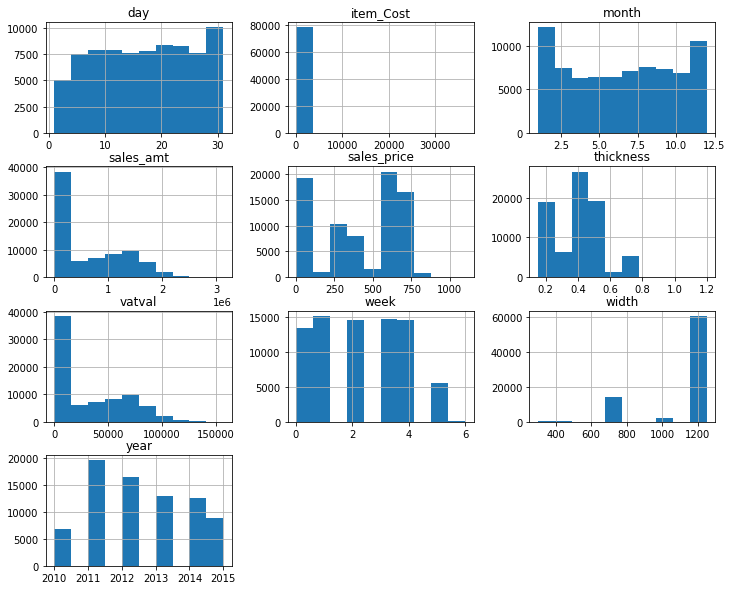

In [ ]:
combined = combined[num_cols + cat_cols]
combined.hist(figsize = (12,10))
plt.show()

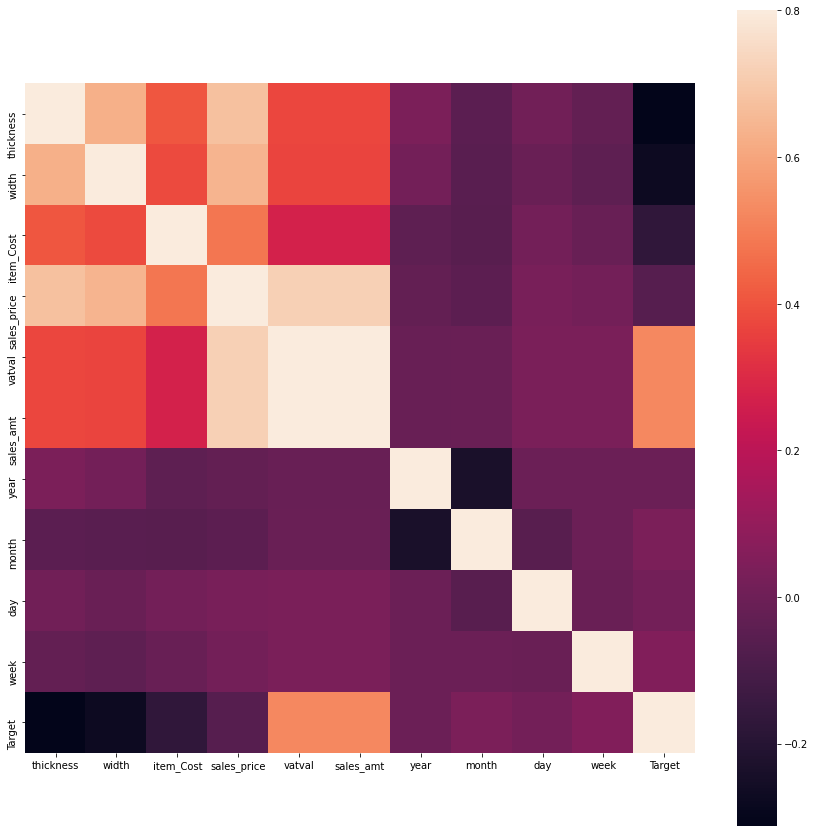

In [ ]:
train_data = train_data[num_cols + cat_cols]
train_data['Target'] = target

C_mat = train_data.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [ ]:
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df
    

print('There were {} columns before encoding categorical features'.format(combined.shape[1]))
combined = oneHotEncode(combined, cat_cols)
print('There are {} columns after encoding categorical features'.format(combined.shape[1]))

There were 13 columns before encoding categorical features
There are 78 columns after encoding categorical features


In [ ]:
l=len(train_set)
def split_combined():
    global combined
    train = combined[:l]
    test = combined[l:]

    return train , test 
  
train, test = split_combined()

In [ ]:
print(train.shape,test.shape)

(68954, 78) (8941, 78)


In [ ]:
#trying another algorithm
train_X, val_X, train_y, val_y = train_test_split(train, target, test_size = 0.25, random_state = 14)


In [ ]:
# define baseline model
def baseline_model():
  NN_model = Sequential()

# The Input Layer :
  NN_model.add(Dense(100, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
  NN_model.add(Dense(50, kernel_initializer='normal',activation='relu'))
  NN_model.add(Dense(25, kernel_initializer='normal',activation='relu'))
  NN_model.add(Dense(25, kernel_initializer='normal',activation='relu'))

# The Output Layer :
  NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
  NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy','mse'])
  NN_model.summary()
  return model

estimator = KerasClassifier(build_fn=baseline_model, nb_epoch=200, batch_size=5, verbose=0)
model = baseline_model()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               7900      
_________________________________________________________________
dense_11 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_12 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_13 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 26        
Total params: 14,901
Trainable params: 14,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#defining a checkpoint for best model
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
#train the model
#history=NN_model.fit(train, target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

In [ ]:
model=NN_model.fit(train_X,train_y, epochs=40, batch_size=32, validation_data =(val_X,val_y),callbacks=callbacks_list)


Train on 51715 samples, validate on 17239 samples
Epoch 1/40
51715/51715 [==============================] - 3s 56us/step - loss: 471.8939 - mean_absolute_error: 471.8944 - accuracy: 0.0030 - mse: 933345.5625 - val_loss: 184.3244 - val_mean_absolute_error: 184.3244 - val_accuracy: 0.0047 - val_mse: 134765.1094

Epoch 00001: val_loss improved from inf to 184.32443, saving model to Weights-001--184.32443.hdf5
Epoch 2/40
51715/51715 [==============================] - 3s 55us/step - loss: 197.1489 - mean_absolute_error: 197.1490 - accuracy: 0.0047 - mse: 144881.2031 - val_loss: 169.0660 - val_mean_absolute_error: 169.0659 - val_accuracy: 0.0022 - val_mse: 110227.8047

Epoch 00002: val_loss improved from 184.32443 to 169.06596, saving model to Weights-002--169.06596.hdf5
Epoch 3/40
51715/51715 [==============================] - 3s 52us/step - loss: 175.0868 - mean_absolute_error: 175.0868 - accuracy: 0.0055 - mse: 122740.7109 - val_loss: 153.9082 - val_mean_absolute_error: 153.9082 - val_acc

In [ ]:
# To save model
model.save('my_model_01.hdf5')

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_accuracy', 'val_mse', 'loss', 'mean_absolute_error', 'accuracy', 'mse'])


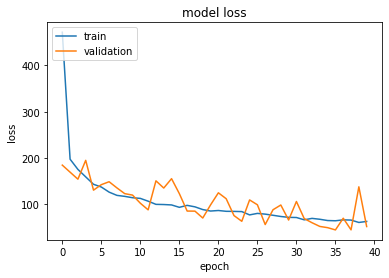

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Load wights file of the best model :
#wights_file = '/content/Weights-162--28.40366.hdf5' # choose the best checkpoint 
#NN_model.load_weights(wights_file) # load it
#NN_model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error','mean_absolute_error','accuracy'])

In [ ]:
#history=NN_model.fit(train_X,train_y, epochs=200, batch_size=32, validation_data =(val_X,val_y))


dict_keys(['val_loss', 'val_mean_absolute_error', 'val_accuracy', 'val_mse', 'loss', 'mean_absolute_error', 'accuracy', 'mse'])


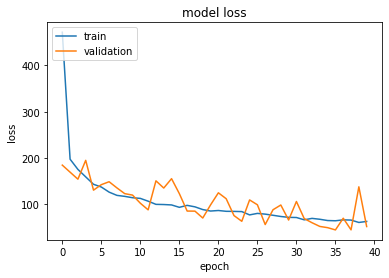

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model


In [ ]:
from sklearn.metrics import mean_squared_error
pred_nn= NN_model.predict(val_X)
score_nn = np.sqrt(mean_squared_error(val_y,pred_nn))
MAE_nn = mean_absolute_error(val_y , pred_nn)
print (score_nn)
print(MAE_nn)


91.59208791775765
51.441270903386474


In [ ]:
# Import 'r2_score'

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):

    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [ ]:
R2_nn=performance_metric(val_y,pred_nn)
print(R2_nn)

0.9935590818185762


In [1]:
test_predictions = NN_model.predict(test).flatten()
'''a = plt.axes(aspect='equal')
plt.scatter(target_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0,1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)'''

"a = plt.axes(aspect='equal')\nplt.scatter(target_test, test_predictions)\nplt.xlabel('True Values [MPG]')\nplt.ylabel('Predictions [MPG]')\nlims = [0,1000]\nplt.xlim(lims)\nplt.ylim(lims)\n_ = plt.plot(lims, lims)"

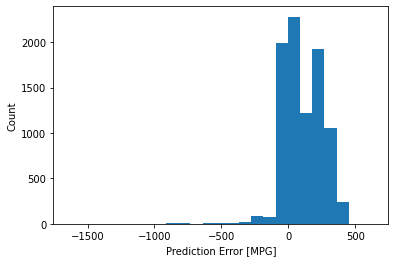

In [ ]:
error = test_predictions - target_test
'''plt.hist(error, bins =25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")'''

In [ ]:
#print(predictions)

NameError: ignored

In [ ]:
model = RandomForestRegressor()
model.fit(train_X,train_y)

# Get the mean absolute error on the validation data
pred_rf = model.predict(val_X)
score_rf = np.sqrt(mean_squared_error(val_y,pred_rf))
MAE_rf = mean_absolute_error(val_y , pred_rf)
print(score_rf)
print('Random forest validation MAE = ', MAE_rf)

In [ ]:
R2_rf=performance_metric(val_y,pred_rf)
print(R2_rf)

In [ ]:
pred_rf = model.predict(test)

In [ ]:
print(pred_rf)

In [ ]:
#trying XgRegressor
XGBModel = XGBRegressor()
historyxgb=XGBModel.fit(train_X,train_y , verbose=False)

# Get the mean absolute error on the validation data :
pred_xgb = XGBModel.predict(val_X)
score_xgb = np.sqrt(mean_squared_error(val_y,pred_xgb))
MAE_xgb = mean_absolute_error(val_y , pred_xgb)
print(score_xgb)
print('XGBoost validation MAE = ',MAE_xgb)

In [ ]:
R2_xgb=performance_metric(val_y,pred_xgb)
print(R2_xgb)

In [ ]:
XGBpredictions = XGBModel.predict(test)